#Singular Value Decomposition and Applications

#Introduction
# Singular Value Decomposition for Data Visualization

## Displaying high-dimensional data using reduced-rank matrices

A data visualization goes a long way in helping you understand the underlying dataset. If the data is highly dimensional, you can use Singular Value Decomposition (SVD) to find a reduced-rank approximation of the data that can be visualized easily.

## Singular value decomposition

Singular value decomposition factorizes an $\mathbb{R}^{m \times n}$ matrix $A$ into

* matrix $U \in \mathbb{R}^{m \times m}$ are the left-singular vectors of $A$, where columns are the set of orthonormal eigenvectors of $A \, A^{\intercal}$
* diagonal matrix $\Sigma$ with entries $\sigma \in \mathbb{R}$ that are the non-negative singular values of $A$
* matrix $V \in \mathbb{R}^{n \times n}$ are the right-singular vectors $A$, where the columns are the set of orthonormal eigenvectors of $A^{\intercal} \, A$

such that 

\begin{align}
  A &= U \, \Sigma \, V^{\intercal}
\end{align}

We can use [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) to factorize the matrix into three components $U$, $\Sigma$, and $V^{\intercal}$.

##Example with a small matrix $A$:

If $A = \begin{bmatrix} 1 & 0 \\ 1 & 2 \end{bmatrix}$
                     
$A$ can be written as $U \Sigma V$ where $U$, $\Sigma$, and $V$ are, rounded to 2 decimal places:

$U = \begin{bmatrix} -0.23 & -0.97 \\ -0.97 & 0.23 \end{bmatrix}$
                     
$S = \begin{bmatrix} 2.29 & 0 \\ 0 & 0.87 \end{bmatrix}$
                     
$V = \begin{bmatrix} -0.53 & -0.85 \\ -0.85 & 0.53 \end{bmatrix}$

## Example 1: the Iris dataset

We start off with the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). The data is multivariate, with 150 measurements of 4 features (length and width cm of both sepal and petal) on 3 distinct Iris species. Of the 150 measurements, there are 50 measurements each for _Iris setosa_, _Iris versicolor_, and _Iris virginica_.

[Scikit Learn's `datasets`](http://scikit-learn.org/stable/datasets/) includes the Iris dataset, so let's load that up and start exploring.

We can use [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) to factorize the Iris data matrix into three components $U$, $\Sigma$, and $V^{\intercal}$.

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats
import sklearn.datasets
import sklearn.preprocessing

%matplotlib inline

In [0]:
iris = sklearn.datasets.load_iris()

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

print('Iris dataset has {} rows and {} columns\n'.format(*df_iris.shape))

print('Here are the first 5 rows of the data:\n\n{}\n'.format(df_iris.head(5)))

print('Some simple statistics on the Iris dataset:\n\n{}\n'.format(df_iris.describe()))

Iris dataset has 150 rows and 4 columns

Here are the first 5 rows of the data:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Some simple statistics on the Iris dataset:

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5

As we are exploring the dataset, it would be nice to view the data in order to get an idea of how the 3 species might be distributed with respect to one another in terms of their features. Perhaps we are interested in finding clusters, or maybe we would like to find a way to make class predictions?

However, since the data has 4 dimensions, we would be "hard-pressed" to come up with a good way to graph the data in 4D that we could easily understand.

_But what if we could reduce or compress the data so that we could work in 3 dimensions or less?_

[Singular value decomposition](http://mathworld.wolfram.com/SingularValueDecomposition.html) lets us do just that.

In [0]:
U_iris, S_iris, Vt_iris = np.linalg.svd(df_iris)

#### $U$: left-singular vectors of $A$

The rows of the $U$ correspond to the rows of original data matrix $A$, while the columns are the set of ordered, orthornormal eigenvectors of $A \, A^{\intercal}$.

In [0]:
print('matrix U has {} rows, {} columns\n'.format(*U_iris.shape))

print('{}'.format(pd.DataFrame(U_iris).head(5)))

matrix U has 150 rows, 150 columns

        0         1         2    ...       147       148       149
0 -0.061617  0.129611  0.002139  ... -0.093434 -0.095739 -0.080855
1 -0.058071  0.111020  0.070672  ...  0.036904 -0.031540  0.013095
2 -0.056763  0.117966  0.004343  ...  0.030662  0.195315  0.135699
3 -0.056653  0.105308  0.005925  ...  0.085419  0.097719 -0.040469
4 -0.061230  0.131090 -0.031881  ...  0.001071 -0.007323 -0.004500

[5 rows x 150 columns]


#### $V$: right-singular vectors of $A$

[`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) actually returns $V^{\intercal}$ instead of $V$, so it is the _columns_ of $V^{\intercal}$ that correspond to the columns of original data matrix $A$. Hence, the _rows_ are the set of ordered, orthornormal eigenvectors of $A^{\intercal} \, A$.

In [0]:
print('matrix Vt has {} rows, {} columns\n'.format(*Vt_iris.shape))

print('{}'.format(pd.DataFrame(Vt_iris).head()))

matrix Vt has 4 rows, 4 columns

          0         1         2         3
0 -0.751108 -0.380086 -0.513009 -0.167908
1  0.284175  0.546745 -0.708665 -0.343671
2  0.502155 -0.675243 -0.059166 -0.537016
3  0.320814 -0.317256 -0.480745  0.751872


#### $\Sigma$: singular values of $A$

The elements $\sigma_{i}$ of diagonal matrix $\Sigma$ are the non-zero singular values of matrix $A$, which are really just the square roots of the non-zero eigenvalues of $A^{\intercal} \, A$ (and also for $A \, A^{\intercal}$). These singular values can be used to determine the amount of variance $A^{\prime}$ explains of the original data matrix $A$ when reducing the dimensions to find a lower rank approximation.

\begin{align}
   A^{\prime}_{k} &=  U_{k} \, \Sigma_{k} \, V^{\intercal}_{k} \\
                           &\approx A_{r} & \text{ where } rank(A^{\prime}) = k \lt rank(X) = r
\end{align}

The amount of variance that the reduced rank approximation $A^{\prime}_{k}$ explains of $A_{r}$ is

\begin{align}
  \text{cum. variance explained} &= \frac{\sum_{j=1}^{k} \sigma_{j}^{2}}{\sum_{i=1}^{r} \sigma_{i}^{2}}
\end{align}

**NOTE**: [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) actually returns a $\Sigma$ that is not a diagonal _matrix_, but a _list_ of the entries on the diagonal.

Let's have a look at the cumulative variance explained visually as a function of the number of singular values used when reducing rank to find a lower-ranked matrix $A^{\prime}$ to approximate $A$. This will inform us as to how many dimensions we should use.

In [0]:
num_sv_iris = np.arange(1, S_iris.size+1)

cum_var_explained_iris = [np.sum(np.square(S_iris[0:n])) / np.sum(np.square(S_iris)) for n in num_sv_iris]

In [0]:
print(cum_var_explained_iris)

[0.9653029806531566, 0.9983719319668035, 0.9996275854698325, 1.0]


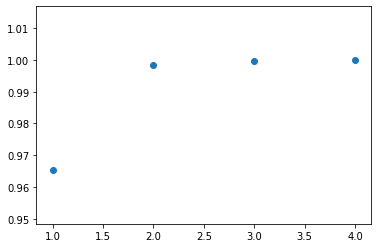

In [0]:
plt.scatter(num_sv_iris, cum_var_explained_iris)
plt.show()

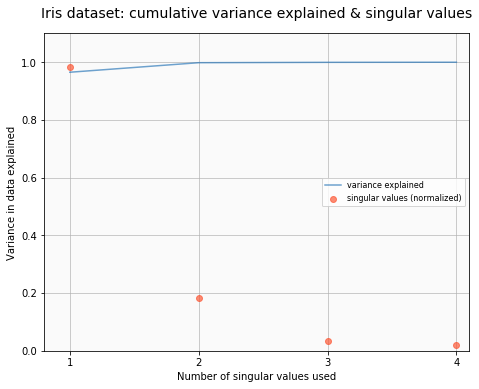

In [0]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.plot(num_sv_iris,
         cum_var_explained_iris,
         color='#2171b5',
         label='variance explained',
         alpha=0.65,
         zorder=1000)

plt.scatter(num_sv_iris,
            sklearn.preprocessing.normalize(S_iris.reshape((1,-1))),
            color='#fc4e2a',
            label='singular values (normalized)',
            alpha=0.65,
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv_iris)
ax.set_xlim(0.8, 4.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel(r'Number of singular values used')
ax.set_ylabel('Variance in data explained')
ax.set_title('Iris dataset: cumulative variance explained & singular values',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()

In [0]:
print(S_iris.reshape((1,-1)))

[[95.95991387 17.76103366  3.46093093  1.88482631]]


#### Dimension reduction

Judging from the curve representing cumulative variance explained in the figure above, we can see that

* with 1 singular value, about 96.5% of the variance of $A$ can be explained
* with 2 singular values, that number goes up to approximately 99.8%

Since graphing the Iris dataset in 1D wouldn't be all that interesting (just dots on a line segment), let's try using the first 2 singular values to represent the data on the $x$- and $y$-axes, respectively.

In [0]:
idx_setosa = np.where(iris.target==0)[0]
idx_versicolor = np.where(iris.target==1)[0]
idx_virginica = np.where(iris.target==2)[0]

setosa_x = U_iris[idx_setosa, 0]
setosa_y = U_iris[idx_setosa, 1]

versicolor_x = U_iris[idx_versicolor, 0]
versicolor_y = U_iris[idx_versicolor, 1]

virginica_x = U_iris[idx_virginica, 0]
virginica_y = U_iris[idx_virginica, 1]

We will use different marker shapes and colors to represent the three Iris species on our 2D graph.

Text(0.5, 1.03, '2D plot of Iris dataset')

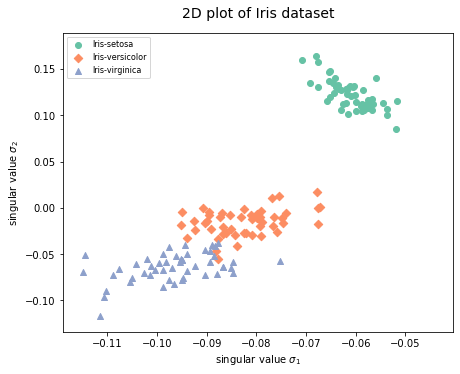

In [0]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.scatter(setosa_x,
            setosa_y,
            marker='o',
            color='#66c2a5',
            label='Iris-setosa',
            zorder=1000)

plt.scatter(versicolor_x,
            versicolor_y,
            marker='D',
            color='#fc8d62',
            label='Iris-versicolor',
            zorder=1000)

plt.scatter(virginica_x,
            virginica_y,
            marker='^',
            color='#8da0cb',
            label='Iris-virginica',
            zorder=1000)

plt.legend(loc='upper left', scatterpoints=1, fontsize=8)

ax.set_xlabel(r'singular value $\sigma_{1}$')
ax.set_ylabel(r'singular value $\sigma_{2}$')
ax.set_title('2D plot of Iris dataset',
             fontsize=14,
             y=1.03)

The singular value decomposition of a matrix has many applications. Let's show how singular value decomposition can be used in image compression.

Any matrix $A$ can be decomposed to three matrices $U$, $\Sigma$, and $V$ such that $A = U \Sigma V$, this is called singular value decomposition. The columns of $U$ and $V$ are orthonormal and $\Sigma$ is diagonal. Most scientific computing packages have a function to compute the singular value decomposition, I won't go into the details of how to find $U$, $\Sigma$ and $V$ here. Some sources write the decomposition as $A = U \Sigma V^T$, so that their $V^T$ is our $V$. The usage in this notebook is consistent with how numpy's singular value decomposition function returns $V$.

##Brief discussion of dimensionality

##Example 2:

![](https://cdn1.gbot.me/photos/kZ/KC/1442431523/-visit_to_Mother_Armenia_S-20000000009210664-375x500.jpg)

In [0]:
from PIL import Image
from io import BytesIO
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

response = requests.get("https://cdn1.gbot.me/photos/kZ/KC/1442431523/-visit_to_Mother_Armenia_S-20000000009210664-375x500.jpg")
img = Image.open(BytesIO(response.content))

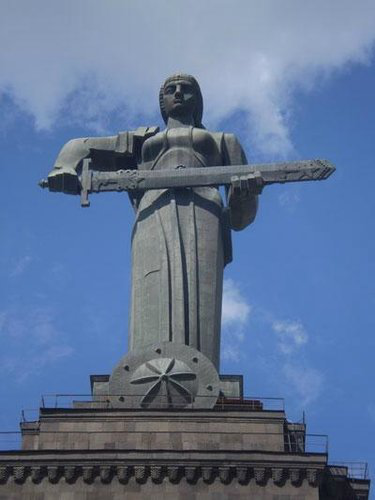

In [0]:
img

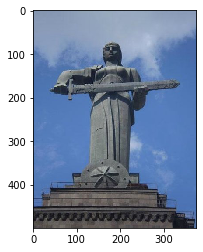

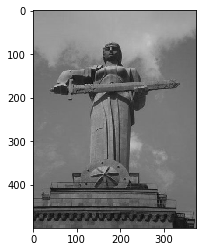

In [0]:
plt.imshow(img);
imggray = img.convert('LA')
plt.figure()
plt.imshow(imggray);

Now we'll convert the image data into a numpy matrix, plotting the result to show the data is unchanged.

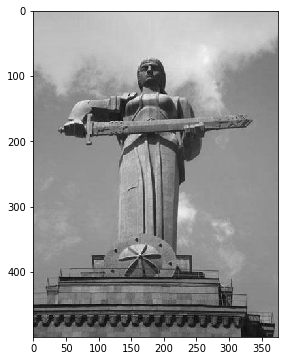

In [0]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

Now to compute the singular value decomposition:

In [0]:
U, sigma, V = np.linalg.svd(imgmat)

Computing an approximation of the image using the first column of U and first row of V reproduces the most prominent feature of the image, the light area on top and the dark area on the bottom. The darkness of the arch causes the extra darkness in the middle of the reconstruction. Each column of pixels in this image is a different weighting of the same values, $\vec{u}_1$:

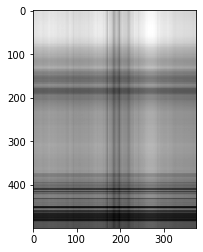

In [0]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

Even with just the second and third vectors, the shape of the arch begins to appear.

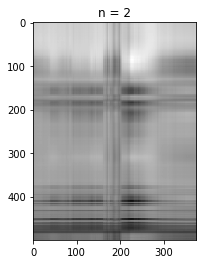

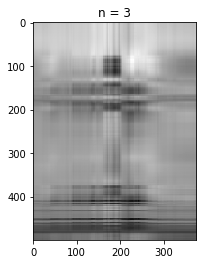

In [0]:
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

The loop below shows the reconstructed image using the first n vectors of the singular value decomposition (n is shown in the title of the plot). The first 50 vectors produce an image very close the original image.

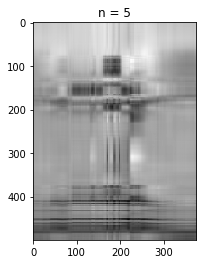

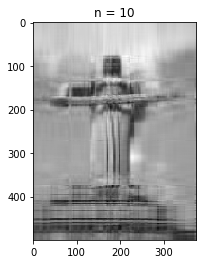

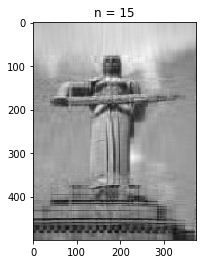

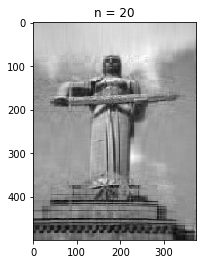

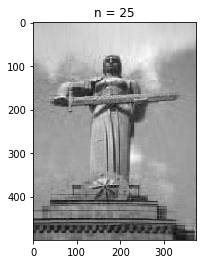

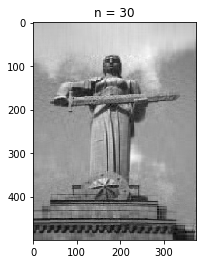

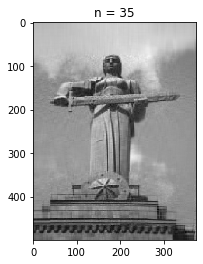

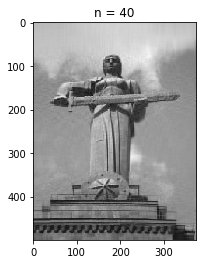

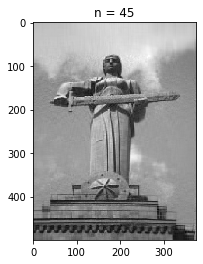

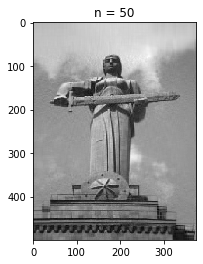

In [0]:
for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [0]:
print(imgmat.shape)

(500, 375)
